In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

- Data cleaning and exploration
- Data preparation 
- Build model and predict 

### Data cleaning and exploration

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("SampleSubmission.csv")
definitions = pd.read_csv("VariableDefinitions.csv")

In [3]:
# test["Year"].unique()

In [4]:
definitions

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the sell...
1,Maker,This is the manufacturer of the car. It is the...
2,Model,This is the the name of the car product within...
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is th...
6,Type,"This is the nature of previous use of the car,..."
7,Distance,This is the mileage of the car. It is how much...


In [5]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [6]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [7]:
sample_sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount (Million Naira),7188.0,11.847999,25.318922,0.45,3.5,5.65,11.6625,456.0


In [11]:
print(train.shape, test.shape)

(7205, 9) (2061, 8)


In [12]:
# check unique values for categorical columns
cat_feat = ["Location", "Maker", "Model", "Colour", "Type"]

print("Train")
for col in cat_feat:
    print(train[col].unique())
    print(len(train[col].unique()))
  

# 'G' in train   

Train
['Abuja' 'Ibadan' 'Lagos']
3
['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus']
55
['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... 'Almera 1.6 Lux'
 'X5 3.0i Sports Activity' '320i SV Premium']
1223
['Silver' 'Red' 'Blue' 'Black' 'Gold' 'White' 'Gray' 'Burgandy' 'Green'
 'Violet' 'Brown' 'Yellow' 'Orange' 'Pink' 'Beige' 'Purple' 'Ivory' 'G'
 'Teal' 'Mica' 'Pearl']
21
['Nigerian Used' 'Foreign Used' 'Brand New' nan]
4


In [13]:
print("Test")  
for col in cat_feat:
    print(test[col].unique())
    print(len(test[col].unique()))
    
# 'V' in colours 

Test
['Abuja' 'Lagos' 'Ibadan']
3
['BMW' 'Toyota' 'Lexus' 'Mercedes-Benz' 'Honda' 'Pontiac' 'Hyundai'
 'Land Rover' 'Mitsubishi' 'Volkswagen' 'Acura' 'Mazda' 'Ford' 'Jaguar'
 'Opel' 'Infiniti' 'Kia' 'Peugeot' 'Nissan' 'Chevrolet' 'Cadillac' 'Seat'
 'Audi' 'Porsche' 'Dodge' 'GMC' 'Renault' 'Lincoln' 'Maserati' 'Chrysler'
 'Fiat' 'Subaru' 'Mini' 'Scion' 'Buick' 'Rolls-Royce' 'Volvo' 'Jeep'
 'Lamborghini' 'Brabus']
40
['323i' 'Camry' 'Highlander Limited V6' 'ES 350 FWD' 'GLE-Class'
 'Sienna LE 4dr' 'ES 350' 'CR-V' 'RAV4 XLE FWD' 'RX' 'Sequoia'
 '4-Runner Limited' 'Corolla LE' 'Accord' 'Highlander SE' 'Vibe AWD'
 'RX 350 F Sport FWD' 'Creta' 'Range Rover Vogue' 'E320'
 'Land Cruiser Prado' 'Sonata' 'Sienna' '4-Runner Limited 4WD' 'C300'
 'E350' 'L200 Double Cab 2.5 136hp' 'Avalon XLE Plus (3.5L 6cyl 6A)'
 '4-Runner' 'RX 330' 'Touareg' 'GX 460 Base' 'GL-Class' 'M Class'
 'M Class ML 350 4Matic' 'GLK-Class' 'ES' 'Corolla' 'TLX' 'LX 570 Base'
 'Hilux' 'RX 350' 'IS 350' 'Premacy' 'Venza XLE AW

In [14]:
train.drop(["Model", "VehicleID"], axis=1, inplace=True)
test.drop(["Model", "VehicleID"], axis=1, inplace=True)

In [15]:
train.sample(5)

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
4159,Lagos,Lexus,"2,015",Gold,11.70,Foreign Used,"89,555"
2282,Abuja,Toyota,"2,004",Green,1.60,Nigerian Used,NaN
1072,Lagos,Lexus,"2,010",White,9.60,Foreign Used,"71,224"
4572,Lagos,Toyota,"2,014",Gray,17.50,Foreign Used,NaN
3224,Lagos,Toyota,"2,008",Black,4.61,Nigerian Used,"105,274"


In [16]:
train[train["Colour"] == 'G']

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
3266,Lagos,Toyota,"2,014",G,15.0,Nigerian Used,"35,000"


In [17]:
test[test["Colour"] == 'V']

,Location,Maker,Year,Colour,Type,Distance
1753,Abuja,Toyota,"2,009",V,Nigerian Used,NaN


In [18]:
# train_1 = train.copy()
# train_1.drop(3266, axis=0, inplace=True)

In [19]:
train["Colour"].replace('G', np.nan, inplace=True)

In [20]:
test["Colour"].replace('V', np.nan, inplace=True)

In [21]:
train.isna().sum()

Location                     0
Maker                        0
Year                        21
Colour                       1
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [22]:
test.isna().sum() 

Location      0
Maker         0
Year          2
Colour        1
Type         54
Distance    676
dtype: int64

In [23]:
train["Year"] = train["Year"].str.replace(",", "")
train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,2011,Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,2012,Silver,3.5,Nigerian Used,"125,000"
2,Lagos,Lexus,2010,Red,9.2,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,2017,Blue,22.8,Foreign Used,"30,000"
4,Ibadan,Toyota,2002,Red,2.6,Nigerian Used,"125,206"


In [24]:
test["Year"] = test["Year"].str.replace(",", "")
test.head()

,Location,Maker,Year,Colour,Type,Distance
0,Abuja,BMW,2008,White,Foreign Used,30524.0
1,Lagos,Toyota,2013,White,Foreign Used,NaN
2,Lagos,Toyota,2005,Gold,Foreign Used,NaN
3,Lagos,Toyota,2011,Gray,Foreign Used,166839.0
4,Lagos,Lexus,2013,Red,Foreign Used,88862.0


In [25]:
# Conver year column to integer
train["Year"]  = pd.to_numeric(train["Year"], errors='coerce', downcast="integer")
test["Year"]  = pd.to_numeric(test["Year"], errors='coerce', downcast="integer")


In [26]:
# Null values 

In [27]:
train["Year"].mode()[0]

2008.0

In [28]:
to_fill_with_mode = ["Year", "Colour", "Type"]

for item in to_fill_with_mode:
    train[item].fillna(train[item].mode()[0], inplace=True)
    test[item].fillna(test[item].mode()[0], inplace=True)

In [29]:
# train["Year"].fillna(train["Year"].mode()[0], inplace=True)
# test["Year"].fillna(test["Year"].mode()[0], inplace=True)

In [30]:
train["Year"] = train["Year"].astype(int)
test["Year"] = test["Year"].astype(int)

In [31]:
train.isnull().sum()

Location                     0
Maker                        0
Year                         0
Colour                       0
Amount (Million Naira)      17
Type                         0
Distance                  2360
dtype: int64

In [32]:
test.isnull().sum()

Location      0
Maker         0
Year          0
Colour        0
Type          0
Distance    676
dtype: int64

In [33]:
train.columns

Index(['Location', 'Maker', 'Year', 'Colour', 'Amount (Million Naira)', 'Type',
       'Distance'],
      dtype='object')

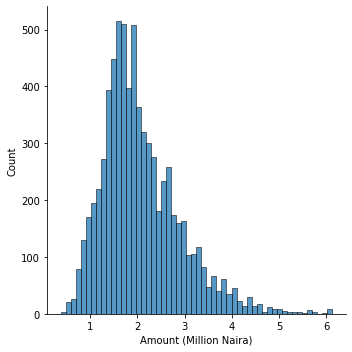

In [34]:
sns.displot(np.log1p(train["Amount (Million Naira)"]));

In [35]:
train["Amount (Million Naira)"].fillna(train["Amount (Million Naira)"].median(), inplace=True)

In [36]:
train["Distance"] = train["Distance"].str.replace(",", "")
train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,2011,Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,2012,Silver,3.5,Nigerian Used,125000
2,Lagos,Lexus,2010,Red,9.2,Foreign Used,110852
3,Abuja,Mercedes-Benz,2017,Blue,22.8,Foreign Used,30000
4,Ibadan,Toyota,2002,Red,2.6,Nigerian Used,125206


In [37]:
train["Distance"]  = pd.to_numeric(train["Distance"], errors='coerce', downcast="integer")

In [38]:
train["Distance"].dtype

dtype('float64')

In [39]:
train["Distance"].fillna(train["Distance"].median(), inplace=True)
test["Distance"].fillna(test["Distance"].median(), inplace=True)

In [40]:
train.isna().sum()

Location                  0
Maker                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [41]:
test.isna().sum()

Location    0
Maker       0
Year        0
Colour      0
Type        0
Distance    0
dtype: int64

### Data Preparation

In [42]:
# encode categorical variables 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [43]:
del cat_feat[2]

In [44]:
cat_feat

['Location', 'Maker', 'Colour', 'Type']

In [45]:
print("Train Set")
for col in cat_feat:
    print(col, len(train[col].unique()))
print("\n")
print("Test Set")
for col in cat_feat:
    print(col, len(test[col].unique())) 

Train Set
Location 3
Maker 55
Colour 20
Type 3


Test Set
Location 3
Maker 40
Colour 17
Type 3


In [46]:
# train["urban_or_rural"] = enc.fit_transform(train["urban_or_rural"])
# test["urban_or_rural"] = enc.fit_transform(test["urban_or_rural"])

In [47]:
ntrain = train.shape[0]
# ntest = test_df.shape[0]

data = pd.concat((train, test)).reset_index(drop=True)

In [48]:
for col in cat_feat:
    # enc.fit(train[col])
    data[col] = enc.fit_transform(data[col])
    # test[col] = enc.fit_transform(test[col])

In [49]:
data.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,0,17,2011,17,2.2,2,80830.0
1,1,19,2012,17,3.5,2,125000.0
2,2,29,2010,16,9.2,1,110852.0
3,0,34,2017,3,22.8,1,30000.0
4,1,53,2002,16,2.6,2,125206.0


In [50]:
pd.to_datetime(data["Year"])

0      1970-01-01 00:00:00.000002011
1      1970-01-01 00:00:00.000002012
2      1970-01-01 00:00:00.000002010
3      1970-01-01 00:00:00.000002017
4      1970-01-01 00:00:00.000002002
                    ...             
9261   1970-01-01 00:00:00.000002020
9262   1970-01-01 00:00:00.000002011
9263   1970-01-01 00:00:00.000002015
9264   1970-01-01 00:00:00.000002013
9265   1970-01-01 00:00:00.000002009
Name: Year, Length: 9266, dtype: datetime64[ns]

In [51]:
df = data.copy()
# df["Year"] = pd.to_datetime(df["Year"])
# df = df.set_index("Year")
df.head() 

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,0,17,2011,17,2.2,2,80830.0
1,1,19,2012,17,3.5,2,125000.0
2,2,29,2010,16,9.2,1,110852.0
3,0,34,2017,3,22.8,1,30000.0
4,1,53,2002,16,2.6,2,125206.0


In [52]:
df['Interval'] = (10 * (df['Year'] // 10))
df.sample(8)

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance,Interval
2816,0,34,2008,2,4.30,1,78000.0,2000
6855,1,53,2005,16,1.75,2,198653.0,2000
5210,2,34,2011,20,6.65,1,80830.0,2010
3149,2,53,2018,20,48.00,0,80830.0,2010
2891,2,29,2020,2,65.00,0,25.0,2020
3320,2,29,2013,8,11.00,1,50214.0,2010
5754,2,53,2001,17,1.01,2,319360.0,2000
3986,0,29,2005,8,3.04,2,117149.0,2000


In [53]:
# df['decade'] = (df['Year'].apply(lambda x: x[:2])).astype('category')
# df.groupby(pd.Grouper(freq = '10Y')).mean()

In [54]:
train = df[:ntrain]
test = df[ntrain:].copy()

In [55]:
train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance,Interval
0,0,17,2011,17,2.2,2,80830.0,2010
1,1,19,2012,17,3.5,2,125000.0,2010
2,2,29,2010,16,9.2,1,110852.0,2010
3,0,34,2017,3,22.8,1,30000.0,2010
4,1,53,2002,16,2.6,2,125206.0,2000


In [56]:
test.drop("Amount (Million Naira)", axis=1, inplace=True)
test.reset_index(drop=True, inplace=True)
test.head()

,Location,Maker,Year,Colour,Type,Distance,Interval
0,0,3,2008,20,1,30524.0,2000
1,2,53,2013,20,1,82000.0,2010
2,2,53,2005,7,1,82000.0,2000
3,2,53,2011,8,1,166839.0,2010
4,2,29,2013,16,1,88862.0,2010


### Train and Evaluate Models

In [57]:
y = train["Amount (Million Naira)"]
X = train.drop("Amount (Million Naira)", axis=1)

In [58]:
# train

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent

In [60]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5764, 7) (5764,)
(1441, 7) (1441,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
lr_pred = lr.predict(X_test)

# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_test, lr_pred, squared=False)

15.790095529598814

In [63]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=200) # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)

RandomForestRegressor(random_state=200)

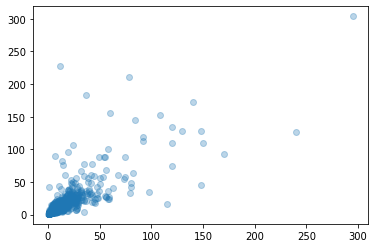

In [64]:
plt.scatter(y_test, model.predict(X_test), alpha=0.3);

In [65]:
mean_squared_error(y_test, model.predict(X_test), squared=False)

12.853944229028869

In [66]:
# model.fit(X, y)

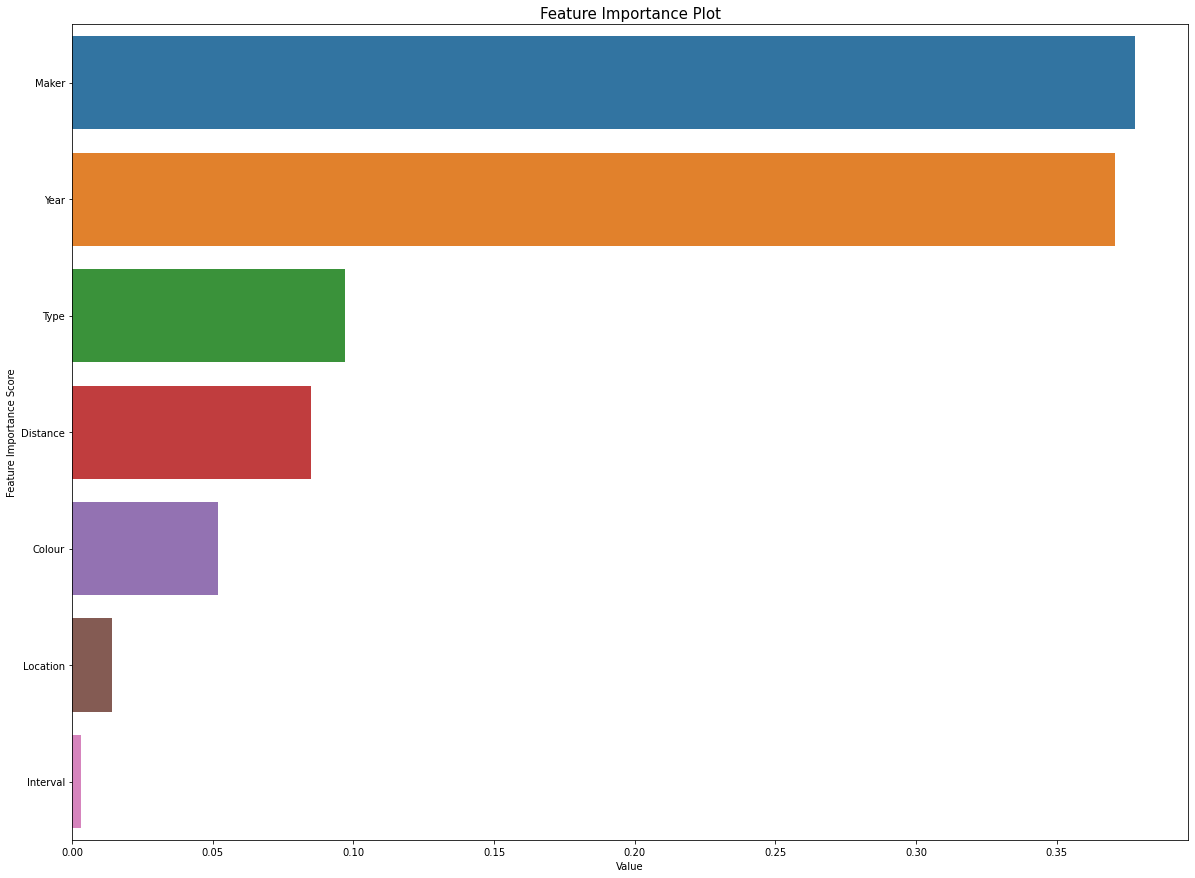

In [67]:
def feat_importance(model):
    feat_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), 
                                columns=['Value','Feature']) 
    plt.figure(figsize=(20,15))
    imp_data = feat_imp.sort_values(by="Value", ascending=False)
    sns.barplot(x="Value", y="Feature", data=imp_data)
    plt.ylabel('Feature Importance Score')
    plt.title('Feature Importance Plot', size=15)
    plt.show() 
    
feat_importance(model)

In [68]:
# (10 ** (np.log10(train["Amount (Million Naira)"])) == train["Amount (Million Naira)"]).sum()

In [69]:
# (np.exp(np.log(train["Amount (Million Naira)"])) == train["Amount (Million Naira)"]).sum()

In [70]:
from lightgbm import LGBMRegressor

params = {'colsample_bytree': 0.384606276881856,
 'learning_rate': 0.23251453473545997,
 'max_depth': 7,
 'subsample': 0.3530887571489526}

lgb_model = LGBMRegressor(**params, random_state=419)
lgb_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.384606276881856,
              learning_rate=0.23251453473545997, max_depth=7, random_state=419,
              subsample=0.3530887571489526)

In [71]:
mean_squared_error(y_test, lgb_model.predict(X_test), squared=False) 

12.620285882263985

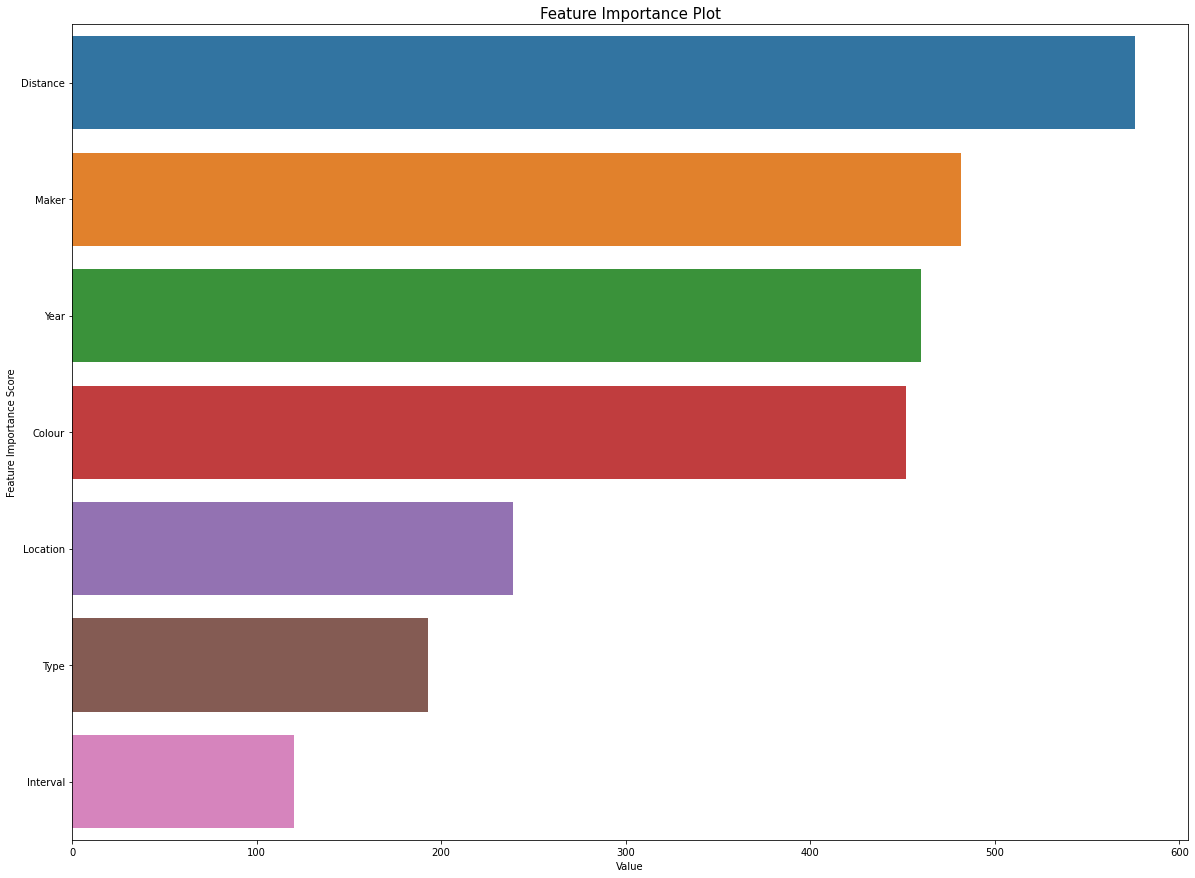

In [72]:
feat_importance(lgb_model)

In [73]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

fold_pred = []
oof_pred = []


fold = KFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = CatBoostRegressor(random_state=267)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False) #erly100
    # model.fit(X_train,y_train)
    
    preds= model.predict(X_test)
    # print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    # oof_pred.append(mean_squared_error(y_test,np.expm1(preds), squared=False))
    
    print("err: ",(mean_squared_error(y_test, preds, squared=False)))  
    oof_pred.append(mean_squared_error(y_test, preds, squared=False))
    p2 = model.predict(test[X.columns])
    # fold_pred.append(np.expm1(p2))
    fold_pred.append(p2) 
    

print(np.mean(oof_pred))

err:  10.58801712226156
err:  11.111475327531297
err:  12.248425699684141
err:  13.546695906128612
err:  17.35057434601013
12.969037680323149


#### Optuna

In [74]:
def objective(trial):
    fold_pred=[]
    oof_pred = []


    param = {}
    # param['objective'] = "rmse"

    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
    param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
    # param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    # param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 16)
    # param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)

    fold=KFold(n_splits=5)
    i = 1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]
        m2 = CatBoostRegressor(**param)
        # m2 = LGBMRegressor(**param)

        m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
        preds = m2.predict(X_test)
        oof_pred.append(mean_squared_error(y_test,np.expm1(preds), squared=False))


    return np.mean(oof_pred)


In [75]:
import optuna

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-06-01 08:51:01,476] A new study created in memory with name: no-name-a66accb6-65ee-484d-b4db-fffc3759dbe9
[I 2022-06-01 08:51:31,760] Trial 0 finished with value: 14.219057947793237 and parameters: {'learning_rate': 0.11755400841765147, 'reg_lambda': 0.002260141819640732, 'subsample': 0.9729989233469262, 'max_depth': 9}. Best is trial 0 with value: 14.219057947793237.
[I 2022-06-01 08:51:38,489] Trial 1 finished with value: 13.015464983372713 and parameters: {'learning_rate': 0.03409117102798327, 'reg_lambda': 0.14614772956232971, 'subsample': 0.4202165456828051, 'max_depth': 6}. Best is trial 1 with value: 13.015464983372713.
[I 2022-06-01 08:51:50,140] Trial 2 finished with value: 14.916533349574507 and parameters: {'learning_rate': 0.012876044480970336, 'reg_lambda': 11.645243329106973, 'subsample': 0.9784940913299637, 'max_depth': 7}. Best is trial 1 with value: 13.015464983372713.
[I 2022-06-01 09:00:15,224] Trial 3 finished with value: 15.198778167642143 and parameters: {

In [ ]:
trial.params

{'learning_rate': 0.24183802439019264,
 'reg_lambda': 8.096662091063897e-06,
 'reg_alpha': 4.674273632204234e-07,
 'subsample': 0.6379749669523209,
 'colsample_bytree': 0.3168825867975862,
 'max_depth': 15,
 'scale_pos_weight': 8}

In [188]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

fold_pred = []
oof_pred = []


fold = KFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LGBMRegressor(**trial.params, random_state=267)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False) #erly100
    # model.fit(X_train,y_train)
    
    preds= model.predict(X_test)
    # print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    # oof_pred.append(mean_squared_error(y_test,np.expm1(preds), squared=False))
    
    print("err: ",(mean_squared_error(y_test, preds, squared=False)))  
    oof_pred.append(mean_squared_error(y_test, preds, squared=False))
    p2 = model.predict(test[X.columns])
    # fold_pred.append(np.expm1(p2))
    fold_pred.append(p2) 
    

print(np.mean(oof_pred))

err:  9.77185437239506
err:  14.70087375167968
err:  14.871054501199925
err:  20.734596520401162
err:  18.086055478647136
15.632886924864593


#### Submit

In [196]:
sample_sub['Amount (Million Naira)'] = np.mean(fold_pred, axis = 0)
sample_sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,6.481697
1,VHL17149,9.034231
2,VHL10927,4.062176
3,VHL12909,5.116837
4,VHL12348,11.377138


In [197]:
sample_sub.to_csv("catboost_oof_transform.csv", index=False) 